<a href="https://colab.research.google.com/github/JakeOh/202011_itw_bd21/blob/main/lab_ml/ml17_dnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

# Fashion MNIST datasets

In [2]:
(x_train_full, y_train_full), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
x_train_full.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

0 ~ 255 정수 범위의 입력값들을 0.0 ~ 1.0 범위의 실수(float)으로 변환 -> 훈련 성능을 높이기 위해서

In [5]:
np.min(x_train_full), np.max(x_train_full)

(0, 255)

In [6]:
x_train_full_scaled = x_train_full / 255.0
x_test_scaled = x_test / 255.0

In [7]:
np.min(x_train_full_scaled), np.max(x_train_full_scaled)

(0.0, 1.0)

훈련 셋 전체를 훈련 셋(train set)과 검증 셋(validation set)으로 나눔.

In [8]:
x_train, x_val, y_train, y_val = train_test_split(x_train_full_scaled, y_train_full,
                                                  stratify=y_train_full,
                                                  test_size=0.1,
                                                  random_state=42)
#> 훈련 셋(x_train), 검증 셋(x_val), 훈련 타겟(y_train), 검증 타겟(y_val)

In [9]:
x_train.shape, x_val.shape

((54000, 28, 28), (6000, 28, 28))

In [10]:
y_train.shape, y_val.shape

((54000,), (6000,))

# DNN

input layer --> flatten layer --> dense layer(300 units) --> dense layer(100 units) --> output layer

In [11]:
# Sequential 모델 생성
model = keras.Sequential()
# flatten layer 추가: (28, 28) shape 배열 --> (784,) shape 배열
model.add(keras.layers.Flatten(input_shape=(28, 28)))
# 첫번째 hidden layer
model.add(keras.layers.Dense(units=300, activation='relu'))
# 두번째 hidden layer
model.add(keras.layers.Dense(units=100, activation='relu'))
# output layer
model.add(keras.layers.Dense(units=10, activation='softmax'))

# 모델 확인
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


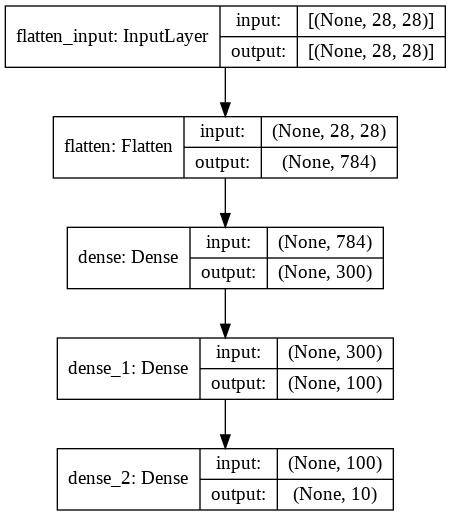

In [12]:
keras.utils.plot_model(model, show_shapes=True, to_file='dnn1.png')

In [13]:
# 모델 컴파일
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [14]:
# 모델 훈련
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_val, y_val))

Epoch 1/30
1688/1688 [==============================] - 7s 2ms/step - loss: 0.9733 - accuracy: 0.6910 - val_loss: 0.5154 - val_accuracy: 0.8197
Epoch 2/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.5023 - accuracy: 0.8260 - val_loss: 0.4507 - val_accuracy: 0.8413
Epoch 3/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4491 - accuracy: 0.8449 - val_loss: 0.4171 - val_accuracy: 0.8562
Epoch 4/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4211 - accuracy: 0.8546 - val_loss: 0.4090 - val_accuracy: 0.8568
Epoch 5/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3943 - accuracy: 0.8619 - val_loss: 0.3863 - val_accuracy: 0.8635
Epoch 6/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3760 - accuracy: 0.8672 - val_loss: 0.3979 - val_accuracy: 0.8582
Epoch 7/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3652 - accuracy: 0.8707 - val_loss: 0.3504 - val_accuracy:

In [25]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [16]:
history.params

{'epochs': 30, 'steps': 1688, 'verbose': 1}

In [17]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [18]:
np.around(history.history['loss'], decimals=4)

array([0.7064, 0.4846, 0.4409, 0.4138, 0.3928, 0.3764, 0.3643, 0.3515,
       0.3416, 0.3319, 0.3226, 0.3149, 0.3074, 0.3009, 0.2935, 0.2874,
       0.2816, 0.2768, 0.2698, 0.2653, 0.2609, 0.2561, 0.2513, 0.2465,
       0.2426, 0.239 , 0.2345, 0.2301, 0.2258, 0.2221])

In [19]:
np.around(history.history['val_loss'], decimals=4)

array([0.5154, 0.4507, 0.4171, 0.409 , 0.3863, 0.3979, 0.3504, 0.3521,
       0.3445, 0.3409, 0.322 , 0.3196, 0.3716, 0.3292, 0.3141, 0.325 ,
       0.3428, 0.3094, 0.3465, 0.3474, 0.3048, 0.3104, 0.298 , 0.2981,
       0.2992, 0.3344, 0.2975, 0.2857, 0.2924, 0.3074])

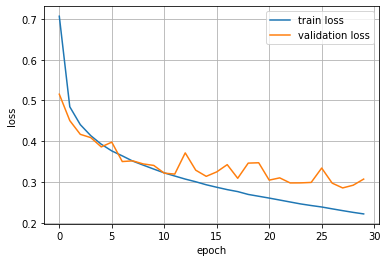

In [20]:
# 손실 곡선
plt.plot(history.epoch, history.history['loss'], label='train loss')
plt.plot(history.epoch, history.history['val_loss'], label='validation loss')

plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

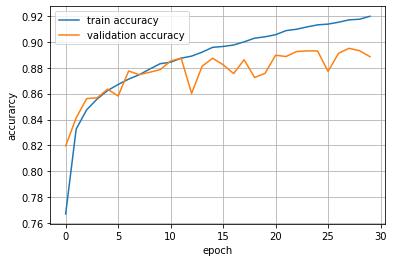

In [21]:
# 정확도 곡선
plt.plot(history.epoch, history.history['accuracy'], label='train accuracy')
plt.plot(history.epoch, history.history['val_accuracy'], label='validation accuracy')

plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accurarcy')
plt.show()

손실 곡선과 정확도 곡선을 그려보면

*   훈련 셋에서는 손실은 작아지고 정확도는 좋아짐.
*   검증 셋에서는 어느 순간(epoch)까지는 손실이 줄어들고 정확도도 좋아지다가, 어느 순간 이후로는 더이상 개선되지 않음 - 과대적합(overfitting)
*   epoch를 적절한 순간에 멈추는 기법이 필요.


In [22]:
loss_acc_hist = pd.DataFrame(history.history)
loss_acc_hist.head()

,loss,accuracy,val_loss,val_accuracy
0,0.706439,0.767167,0.515391,0.819667
1,0.484557,0.832630,0.450716,0.841333
2,0.440859,0.847537,0.417089,0.856167
3,0.413770,0.855889,0.409035,0.856833
4,0.392839,0.862444,0.386261,0.863500


In [23]:
loss_acc_hist.tail()

,loss,accuracy,val_loss,val_accuracy
25,0.239037,0.913704,0.334426,0.877167
26,0.234489,0.915130,0.297495,0.891167
27,0.230073,0.916963,0.285741,0.895000
28,0.225848,0.917463,0.292375,0.893167
29,0.222063,0.919759,0.307368,0.888500


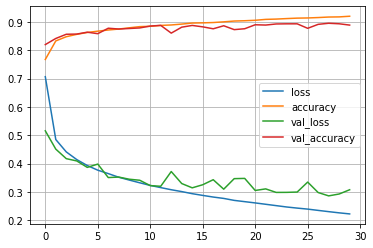

In [24]:
loss_acc_hist.plot()

plt.grid()
plt.show()

# Optimizer 튜닝

Optimizer - 밑바닥부터 시작하는 딥러닝 6장 참고

*   sgd
*   RMSProp
*   Adam

## Momentum

In [27]:
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(units=300, activation='relu'))
    model.add(keras.layers.Dense(units=100, activation='relu'))
    model.add(keras.layers.Dense(units=10, activation='softmax'))
    return model

In [28]:
model1 = create_model()
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [29]:
optimizer = keras.optimizers.SGD(momentum=0.9)
model1.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics='accuracy')

In [30]:
history1 = model1.fit(x_train, y_train, epochs=30, validation_data=(x_val, y_val))

Epoch 1/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.7043 - accuracy: 0.7468 - val_loss: 0.4067 - val_accuracy: 0.8502
Epoch 2/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4011 - accuracy: 0.8531 - val_loss: 0.3432 - val_accuracy: 0.8748
Epoch 3/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3516 - accuracy: 0.8719 - val_loss: 0.3320 - val_accuracy: 0.8790
Epoch 4/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3213 - accuracy: 0.8820 - val_loss: 0.3596 - val_accuracy: 0.8638
Epoch 5/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3036 - accuracy: 0.8857 - val_loss: 0.3092 - val_accuracy: 0.8897
Epoch 6/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2836 - accuracy: 0.8940 - val_loss: 0.3220 - val_accuracy: 0.8825
Epoch 7/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2779 - accuracy: 0.8943 - val_loss: 0.3197 - val_accuracy:

In [31]:
hist1 = pd.DataFrame(history1.history)  # dict --> DataFrame
hist1.head()

,loss,accuracy,val_loss,val_accuracy
0,0.527536,0.810167,0.406696,0.850167
1,0.390022,0.857185,0.343186,0.874833
2,0.347356,0.872019,0.332018,0.879000
3,0.322401,0.880889,0.359626,0.863833
4,0.302178,0.886778,0.309193,0.889667


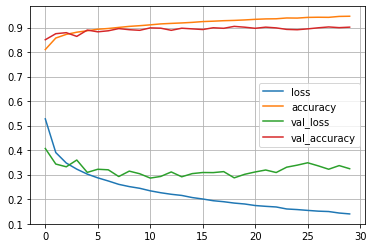

In [32]:
hist1.plot()
plt.grid()
plt.show()

In [34]:
np.argmin(hist1['val_loss'])

10

In [35]:
np.argmax(hist1['val_accuracy'])

18

## RMSProp

In [37]:
model2 = create_model()
model2.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics='accuracy')
history2 = model2.fit(x_train, y_train, epochs=30, validation_data=(x_val, y_val))

Epoch 1/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.6397 - accuracy: 0.7677 - val_loss: 0.3882 - val_accuracy: 0.8547
Epoch 2/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4008 - accuracy: 0.8550 - val_loss: 0.3839 - val_accuracy: 0.8605
Epoch 3/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3737 - accuracy: 0.8685 - val_loss: 0.4118 - val_accuracy: 0.8652
Epoch 4/30
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3558 - accuracy: 0.8757 - val_loss: 0.3784 - val_accuracy: 0.8740
Epoch 5/30
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3403 - accuracy: 0.8828 - val_loss: 0.3621 - val_accuracy: 0.8813
Epoch 6/30
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3301 - accuracy: 0.8851 - val_loss: 0.4244 - val_accuracy: 0.8672
Epoch 7/30
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3336 - accuracy: 0.8863 - val_loss: 0.3663 - val_accuracy:

In [39]:
hist2 = pd.DataFrame(history2.history)
hist2.head()

,loss,accuracy,val_loss,val_accuracy
0,0.504256,0.815982,0.388229,0.854667
1,0.392466,0.859111,0.383862,0.860500
2,0.368989,0.870889,0.411835,0.865167
3,0.357505,0.877148,0.378405,0.874000
4,0.347874,0.881463,0.362138,0.881333


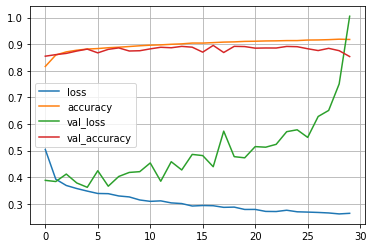

In [41]:
hist2.plot()  # 정확도/손실 곡선
plt.grid()
plt.show()

In [42]:
np.argmin(hist2['val_loss'])

4

In [43]:
np.min(hist2['val_loss'])

0.3621375858783722

## Adam, Nadam

# Callbacks

콜백(callback): 훈련 과정(fit) 중간에 어떤 작업을 수행할 수 있도록 하는 함수.
모델을 훈련(fit)할 때 등록.

## EarlyStopping 콜백

In [44]:
model3 = create_model()

In [45]:
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [46]:
early_stop = keras.callbacks.EarlyStopping(patience=2)  # 조기 종료 콜백
#> val_loss를 모니터링하다가 val_loss가 patience 횟수동안에 더이상 감소하지 않으면 epoch를 강제 종료

history3 = model3.fit(x_train, y_train, epochs=30,
                      validation_data=(x_val, y_val),
                      callbacks=[early_stop])

Epoch 1/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.6249 - accuracy: 0.7794 - val_loss: 0.3590 - val_accuracy: 0.8703
Epoch 2/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3782 - accuracy: 0.8613 - val_loss: 0.3257 - val_accuracy: 0.8810
Epoch 3/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3338 - accuracy: 0.8770 - val_loss: 0.3282 - val_accuracy: 0.8762
Epoch 4/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3040 - accuracy: 0.8866 - val_loss: 0.3087 - val_accuracy: 0.8875
Epoch 5/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2804 - accuracy: 0.8945 - val_loss: 0.2950 - val_accuracy: 0.8937
Epoch 6/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2717 - accuracy: 0.8990 - val_loss: 0.3092 - val_accuracy: 0.8853
Epoch 7/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2538 - accuracy: 0.9042 - val_loss: 0.3070 - val_accuracy:

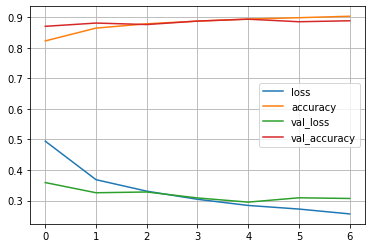

In [47]:
hist3 = pd.DataFrame(history3.history)

hist3.plot()
plt.grid()
plt.show()

In [48]:
model4 = create_model()

In [49]:
model4.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [50]:
history4 = model4.fit(x_train, y_train, epochs=30, 
                      validation_data=(x_val, y_val), callbacks=[early_stop])

Epoch 1/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.6339 - accuracy: 0.7708 - val_loss: 0.3897 - val_accuracy: 0.8510
Epoch 2/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3932 - accuracy: 0.8581 - val_loss: 0.3575 - val_accuracy: 0.8708
Epoch 3/30
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3725 - accuracy: 0.8676 - val_loss: 0.3773 - val_accuracy: 0.8712
Epoch 4/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3574 - accuracy: 0.8752 - val_loss: 0.3445 - val_accuracy: 0.8823
Epoch 5/30
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3410 - accuracy: 0.8821 - val_loss: 0.4067 - val_accuracy: 0.8455
Epoch 6/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3387 - accuracy: 0.8843 - val_loss: 0.4082 - val_accuracy: 0.8732


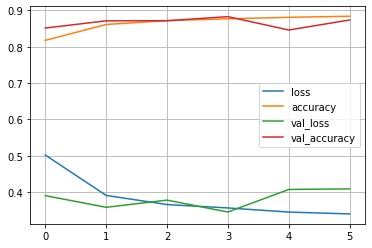

In [52]:
hist4 = pd.DataFrame(history4.history)

hist4.plot()
plt.grid()
plt.show()

In [54]:
model4.evaluate(x_val, y_val)
#> 에포크가 종료된 상태의 가중치 값들을 가지고 있는 모델.
#> val_loss가 가장 작은 상태의 가중치들을 가지고 있지 못함.

188/188 [==============================] - 0s 2ms/step - loss: 0.4082 - accuracy: 0.8732


[0.4082309305667877, 0.8731666803359985]

## ModelCheckpoint 콜백